In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df
# removing the zeros from x,y and z

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]
# checking if there are any zeros in x,y and z

,carat,cut,color,clarity,depth,table,price,x,y,z


In [8]:
for col in ['cut','color','clarity']:
    print('{}:{}'.format(col,df[col].unique()))
df.nunique()

cut:['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color:['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity:['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

<AxesSubplot:>

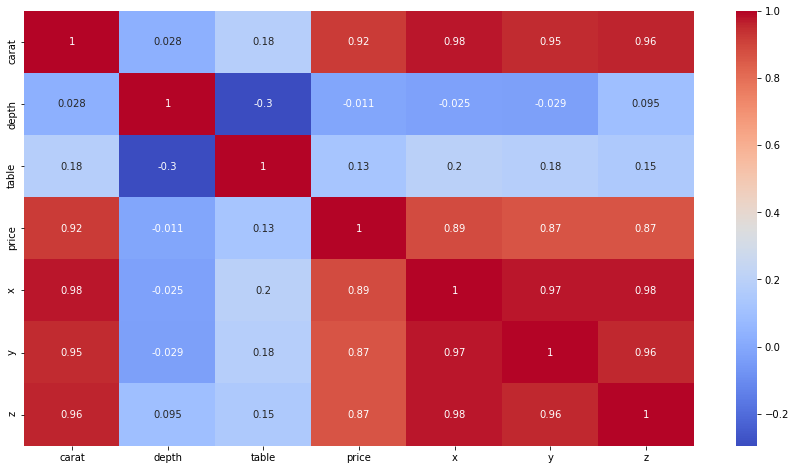

In [9]:
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

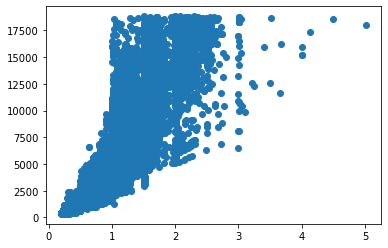

In [10]:
plt.scatter(x=df.carat,y=df.price)

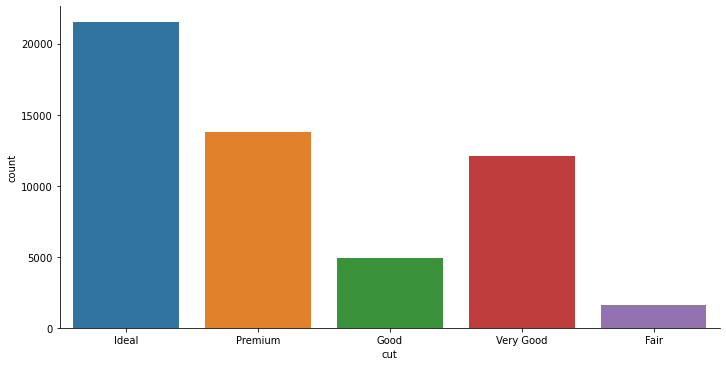

In [11]:
sns.catplot(x='cut',data=df,kind='count',aspect=2) #price vs cut 

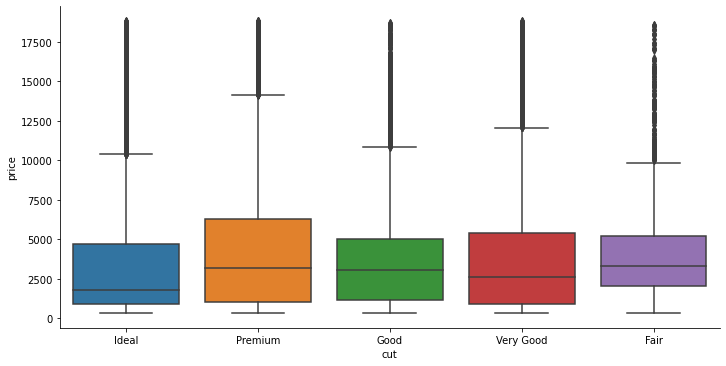

In [12]:
sns.catplot(x='cut',y='price',data=df,kind='box',aspect=2)

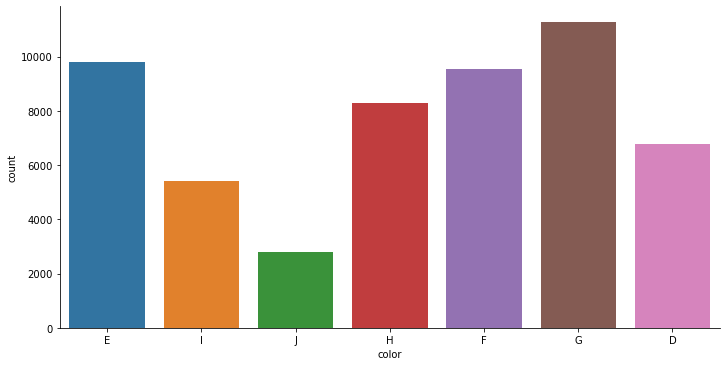

In [13]:
sns.catplot(x='color', data=df , kind='count',aspect=2) #color vs price 

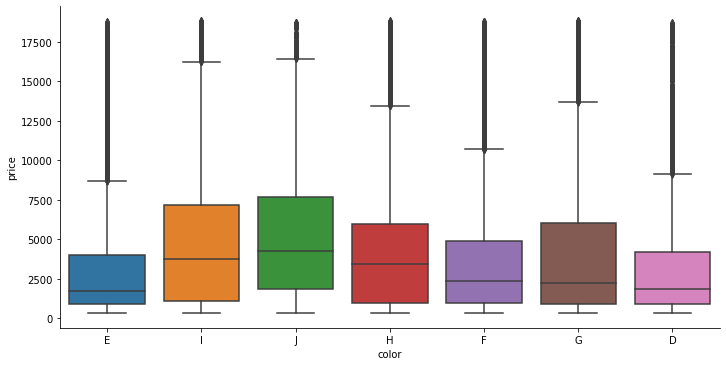

In [14]:
sns.catplot(x='color',y='price',data=df,kind='box',aspect=2) 

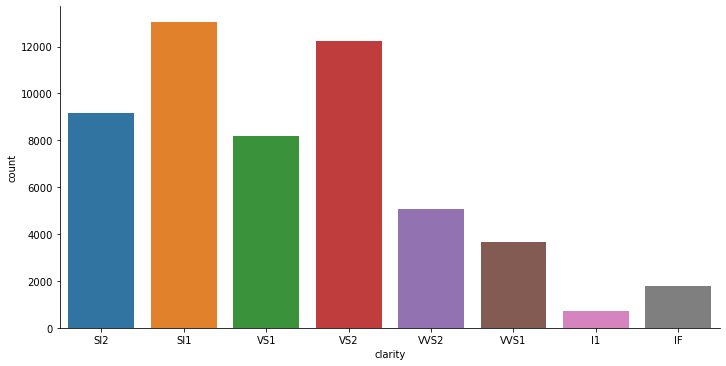

In [15]:
sns.catplot(x='clarity', data=df , kind='count',aspect=2) # clarity vs price 

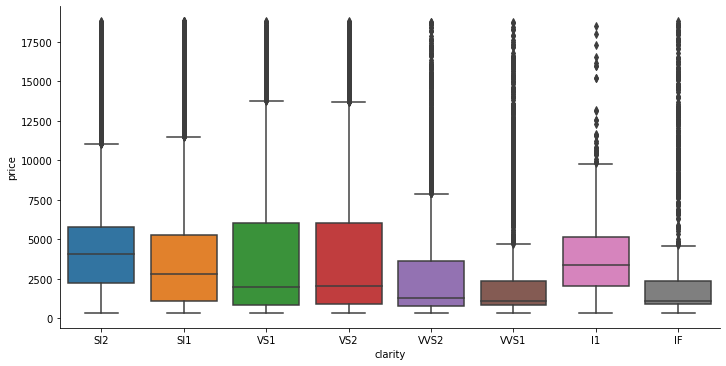

In [16]:
sns.catplot(x='clarity',y='price',data=df,kind='box',aspect=2)

### Now because the x,y and z dimesnions are stronglly correlated we can combine them into a single attribute which is volume 

In [17]:

df['volume']=df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


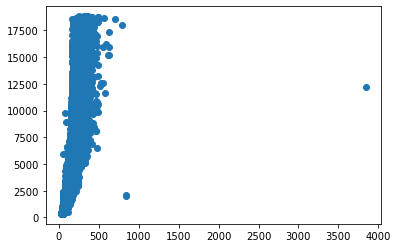

In [18]:
plt.scatter(df.volume,df.price)

In [19]:
df.drop(['x','y','z'],axis=1,inplace=True) # dropping x,y and z since we replaced them with volume 

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# Handling Categorical features

In [21]:
# using python's dictionary and map function
cuts_map = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = [cuts_map.get(item) for item in df['cut']]

colors_map = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
df['color'] = [colors_map.get(item) for item in df['color']]

clarities_map = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = [clarities_map.get(item) for item in df['clarity']]

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,5,1,61.5,55.0,326,38.202030
1,0.21,3,5,2,59.8,61.0,326,34.505856
2,0.23,1,5,4,56.9,65.0,327,38.076885
3,0.29,3,1,3,62.4,58.0,334,46.724580
4,0.31,1,0,1,63.3,58.0,335,51.917250


In [23]:
df.shape

(53920, 8)

# Preparing The Data For Machine Learning 

In [24]:
# seperating the features and the target column, x contains the features and y contains the target(price) column
y = df['price']
x = df.drop(['price'],axis=1)


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [26]:
x_test.head()

,carat,cut,color,clarity,depth,table,volume
8917,0.80,2,5,4,62.4,54.0,132.138864
20172,1.06,4,3,5,60.1,57.0,175.650174
2562,0.79,4,4,2,60.8,55.0,132.415140
28447,0.31,4,2,6,60.9,56.0,52.315120
1661,0.90,2,0,3,63.1,59.0,141.114435


In [27]:
# linear regression
Lreg=LinearRegression()
Lreg.fit(x_train,y_train)
pred=Lreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test, pred))
r2_Lreg=r2_score(y_test,pred)
print(f'RMSE value= {rmse}')
print(f"score Linear Regression= {r2_Lreg}")

RMSE value= 1253.218076020046
score Linear Regression= 0.9034913152848753


In [28]:
#Random Forest
RFreg_model=RandomForestRegressor()
RFreg_model.fit(x_train,y_train)
pred2= RFreg_model.predict(x_test)
rmse_RFreg=np.sqrt(mean_squared_error(y_test,pred2))
print(f'rmse_RF_reg value = {rmse_RFreg}')
r2_RFreg=r2_score(y_test,pred2)
print(f'score Random Forest Regressor = {r2_RFreg}')

rmse_RF_reg value = 534.7515322904173
score Random Forest Regressor = 0.9824281627812753


In [29]:
# using all avilable ram
# Decision Tree 
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
pred3=DT_model.predict(x_test)
rmse_DT_model=np.sqrt(mean_squared_error(y_test,pred3))
print(f'rmse_DT_model= {rmse_DT_model}')
r2_DT_model=r2_score(y_test,pred3)
print(f'score Decision Tree = {r2_DT_model}')

rmse_DT_model= 956.1110431223015
score Decision Tree = 0.9438267224147261


In [30]:
Results= pd.DataFrame({ 'Actual Price': y_test,'Predicted price by Linear Regression':pred, 'predicted Price by Random Forest':pred2,
                      'predicted Price by Decision Tree':pred3})
Results

,Actual Price,Predicted price by Linear Regression,predicted Price by Random Forest,predicted Price by Decision Tree
8917,4495,4892.699954,3993.727500,4893
20172,8626,7329.273271,8653.940000,8295
2562,3210,3739.872186,3134.691667,2365
28447,671,942.123306,761.840667,671
1661,3024,3511.933228,2966.290000,2822
...,...,...,...,...
19418,8073,7615.421976,7222.745000,6125
39909,1104,888.319242,1188.107000,1154
49118,2066,2928.716855,2057.550000,2004
1787,3050,2817.296174,2729.200000,2338


# Fine Tuning The Model

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
print(x_train.info())
print(y_train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43136 entries, 4143 to 11596
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43136 non-null  float64
 1   cut      43136 non-null  int64  
 2   color    43136 non-null  int64  
 3   clarity  43136 non-null  int64  
 4   depth    43136 non-null  float64
 5   table    43136 non-null  float64
 6   volume   43136 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.6 MB
None
count    43136.000000
mean      3924.766089
std       3975.472302
min        326.000000
25%        951.000000
50%       2411.000000
75%       5306.000000
max      18823.000000
Name: price, dtype: float64


In [55]:
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
    ]
grid_search=GridSearchCV(RFreg_model,param_grid,cv=5,scoring='r2',return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [56]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [58]:
df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.348585,0.005352,0.021182,0.003383,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.967542,0.968215,...,0.969454,0.001982,15,0.991115,0.991901,0.991840,0.991717,0.992803,0.991875,0.000541
1,1.097893,0.013116,0.061560,0.001918,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.977963,0.976393,...,0.977791,0.001491,8,0.995636,0.995960,0.995281,0.995454,0.995742,0.995615,0.000234
2,3.261587,0.070347,0.173696,0.004722,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.979485,0.977691,...,0.979229,0.001416,4,0.996773,0.996827,0.996753,0.996822,0.996727,0.996780,0.000039
3,0.498996,0.005804,0.022639,0.002196,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.975583,0.972897,...,0.974057,0.000873,12,0.993137,0.993096,0.993158,0.993905,0.993328,0.993325,0.000301
4,1.631130,0.006865,0.060142,0.003673,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.980827,0.976768,...,0.979530,0.001622,3,0.996345,0.996210,0.996006,0.996282,0.996259,0.996220,0.000116
5,4.875993,0.037514,0.173476,0.002709,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.981691,0.978894,...,0.980778,0.001253,1,0.997020,0.997099,0.996967,0.997067,0.997053,0.997041,0.000045
6,0.667014,0.009387,0.021668,0.001910,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.975643,0.973250,...,0.974743,0.001412,10,0.993393,0.993501,0.993800,0.993580,0.993743,0.993603,0.000151
7,2.156013,0.011463,0.059828,0.001626,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.980109,0.977881,...,0.979123,0.001161,5,0.996244,0.996344,0.996188,0.996332,0.996205,0.996263,0.000064
8,6.470082,0.351733,0.170577,0.002813,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.981330,0.978444,...,0.980301,0.001351,2,0.996950,0.997050,0.996882,0.997036,0.997052,0.996994,0.000068
9,0.512600,0.113066,0.021609,0.005431,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",0.973139,0.971979,...,0.972171,0.001399,14,0.999940,0.999940,0.999944,0.999945,0.999942,0.999942,0.000002


In [59]:
df[['param_max_features','param_n_estimators','mean_test_score']] 
# best combination is 4 features and 30 estimators 

,param_max_features,param_n_estimators,mean_test_score
0,2,3,0.969454
1,2,10,0.977791
2,2,30,0.979229
3,4,3,0.974057
4,4,10,0.979530
5,4,30,0.980778
6,6,3,0.974743
7,6,10,0.979123
8,6,30,0.980301
9,2,3,0.972171


In [63]:
final_model= grid_search.best_estimator_
final_predictions=final_model.predict(x_test)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_r2= r2_score(y_test,final_predictions)
print(f'score = {final_r2}')
print(f' rmse = {final_rmse}')

score = 0.9826488212293288
 rmse = 531.3833521610829


### using grid search we obtained better results for our accuracy and rmse 